In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import RandomizedSearchCV  

In [2]:
df=pd.read_csv(r"C:\Users\hp\Downloads\household_power_consumption.csv")

In [3]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16-12-2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
1,16-12-2006,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2,16-12-2006,17:26:00,5.374,0.498,233.29,23,0,2,17.0
3,16-12-2006,17:27:00,5.388,0.502,233.74,23,0,1,17.0
4,16-12-2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0
...,...,...,...,...,...,...,...,...,...
1048570,13-12-2008,21:34:00,0.426,0.076,242.27,1.8,0,0,0.0
1048571,13-12-2008,21:35:00,0.424,0.076,242.1,1.8,0,0,0.0
1048572,13-12-2008,21:36:00,0.422,0.076,241.73,1.8,0,0,0.0
1048573,13-12-2008,21:37:00,0.422,0.078,242.56,1.8,0,0,0.0


In [4]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16-12-2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
1,16-12-2006,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2,16-12-2006,17:26:00,5.374,0.498,233.29,23,0,2,17.0
3,16-12-2006,17:27:00,5.388,0.502,233.74,23,0,1,17.0
4,16-12-2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0


In [5]:
df.shape

(1048575, 9)

# data is too big so we take a small sample from it for model building

In [6]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [7]:
df.describe()

,Sub_metering_3
count,1.044506e+06
mean,5.933837e+00
std,8.210398e+00
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [8]:
df.corr()

,Sub_metering_3
Sub_metering_3,1.0


In [9]:
df.isnull().sum()

Date                        0
Time                        0
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3           4069
dtype: int64

In [10]:
#df.dropna( axis=1, how="any", thresh=None, subset=None, inplace=True)

In [13]:
df_sample=df.sample(60000)


In [14]:
df_sample.shape

(60000, 9)

In [15]:
#we have taken 60000 samples ut of 1 milion to build the model

In [16]:
#df_sample.drop(['Date','Time'],axis=1,inplace=True)

In [17]:
special_char=df_sample[df_sample['Voltage']=="?"]
special_char

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
191873,28-04-2007,23:17:00,?,?,?,?,?,?,NaN
194207,30-04-2007,14:11:00,?,?,?,?,?,?,NaN
193554,30-04-2007,03:18:00,?,?,?,?,?,?,NaN
191650,28-04-2007,19:34:00,?,?,?,?,?,?,NaN
566016,13-01-2008,19:00:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
327785,01-08-2007,08:29:00,?,?,?,?,?,?,NaN
192803,29-04-2007,14:47:00,?,?,?,?,?,?,NaN
190530,28-04-2007,00:54:00,?,?,?,?,?,?,NaN
303929,15-07-2007,18:53:00,?,?,?,?,?,?,NaN


In [18]:
#DROP THESE RECORDS HAVING SPECIAL CHARACTER

In [19]:
print("data before special characters",df_sample.shape)
df_sample.drop(special_char.index,axis=0,inplace=True)
print("data after special characters",df_sample.shape)

data before special characters (60000, 9)
data after special characters (59771, 9)


In [20]:
#check duplicates

In [21]:
df_sample.duplicated().sum()


0

In [22]:
print("data before duplicated records",df_sample.shape)
df_sample.drop_duplicates(inplace=True)
print("data after duplicated records",df_sample.shape)

data before duplicated records (59771, 9)
data after duplicated records (59771, 9)


In [23]:
df_sample.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

# no null values found in the dataset

In [24]:
df_sample.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [25]:
df_sample.drop(['Date','Time'],axis=1,inplace=True)

In [26]:
df_sample=df_sample.astype(float)

In [27]:
df_sample['meter']=df_sample['Sub_metering_1']+df_sample['Sub_metering_2']+df_sample['Sub_metering_3']

In [28]:
#now drop 3 columns
df_sample.drop(['Sub_metering_1','Sub_metering_2','Sub_metering_3'],axis=1,inplace=True)

In [29]:
df_sample.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,meter
838624,0.238,0.094,238.85,1.0,3.0
123524,2.010,0.234,236.94,8.6,19.0
384105,0.220,0.050,239.87,1.0,0.0
339343,1.414,0.098,234.60,6.0,17.0
23196,0.440,0.126,237.91,1.8,1.0


In [30]:
# Convert the 'Date' and 'Time' columns to a single 'date_time' column
# by combining the two columns and converting to datetime format
#df_sample['date_time'] = pd.to_datetime(df_sample['Date'] + ' ' + df_sample['Time'])

In [31]:
# Convert the 'Global_active_power' column to numeric format
# and remove any rows with NaN values
#df_sample['Global_active_power'] = pd.to_numeric(df_sample['Global_active_power'], errors='coerce')
#df_sample = df_sample.dropna(subset=['Global_active_power'])

In [32]:
#df_sample.head()

In [33]:
# Convert the 'date_time' column to datetime format
#df_sample['date_time'] = pd.to_datetime(df_sample['date_time']) 

In [34]:
# Create new columns for year, quarter, month, and day
#df_sample['year'] = df_sample['date_time'].apply(lambda x: x.year)
#df_sample['quarter'] = df_sample['date_time'].apply(lambda x: x.quarter)
#df_sample['month'] = df_sample['date_time'].apply(lambda x: x.month)
#df_sample['day'] = df_sample['date_time'].apply(lambda x: x.day)

In [35]:
#df_sample.head()

In [36]:
# Sort the data by date_time in ascending order
#df_sample.sort_values('date_time', inplace=True, ascending=True)

In [37]:
# Keep only the columns 'date_time', 'Global_active_power', 'year', 'quarter', 'month', 'day'
#df_sample = df_sample.loc[:,['date_time','Global_active_power', 'year','quarter','month','day']]

In [38]:
# Sort the data by date_time in ascending order
#df_sample.sort_values('date_time', inplace=True, ascending=True)

In [39]:
# Reset the index of the data
#df_sample = df_sample.reset_index(drop=True)
#df_sample.head()

In [40]:
# Create a new column 'weekday' that indicates if the day is a weekday (1) or weekend (0)
#df_sample['weekday'] = df_sample['date_time'].apply(lambda x: x.weekday() < 5).astype(int)

In [41]:
# Print the number of rows and columns in the data
#print('Number of rows and columns:', df_sample.shape)

# Print the minimum and maximum date_time values
#print('Minimum date_time:', df_sample.date_time.min())
#print('Maximum date_time:', df_sample.date_time.max())

# Display the last 5 rows of the data
#df_sample.tail(5)

In [42]:
#df_sample = df_sample.loc[:,['date_time','Global_active_power', 'year','quarter','month','day']]

In [43]:
#df_sample.drop(['Date','Time'],axis=1,inplace=True)


In [44]:
df_sample=df_sample.astype(float)

In [46]:
df_sample.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,meter
838624,0.238,0.094,238.85,1.0,3.0
123524,2.010,0.234,236.94,8.6,19.0
384105,0.220,0.050,239.87,1.0,0.0
339343,1.414,0.098,234.60,6.0,17.0
23196,0.440,0.126,237.91,1.8,1.0


In [47]:
#Testing for Normality of the Global Active Power Data
#Testing for Normality

# the p-value will be used to make the following interpretation:

#If p <= alpha, we will reject the null hypothesis (H0) and conclude that the data is not normally distributed.
#If p > alpha, we will fail to reject the null hypothesis and conclude that the data is normal.

In [48]:
!pip install stats

In [49]:
# Test for Normality of the Global Active Power Data

# Import the required libraries
import scipy.stats as stats

# Calculate the test statistics and p-value
stat, p = stats.normaltest(df_sample.Global_active_power)
# Print the results
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Set the significance level
alpha = 0.05

# Make a decision on the test result
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=20188.182, p=0.000
Data does not look Gaussian (reject H0)


Kurtosis of normal distribution: 3.695512937912331
Skewness of normal distribution: 1.7518866977581877


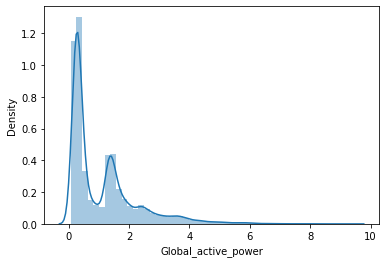

In [50]:
#check Kurtosis and skewness
sns.distplot(df_sample.Global_active_power)
print('Kurtosis of normal distribution: {}'.format(stats.kurtosis(df_sample.Global_active_power)))
print('Skewness of normal distribution: {}'.format(stats.skew(df_sample.Global_active_power)))

 The kurtosis of a normal distribution is close to zero, and if the kurtosis is greater than zero, the distribution has heavier tails.

On the other hand, skewness measures the symmetry of the distribution. If the skewness is between -0.5 and 0.5, the data is considered fairly symmetrical.

However, if the skewness falls between -1 and -0.5 or between 0.5 and 1, the data is considered moderately skewed.

Lastly, if the skewness is less than -1 or greater than 1, the data is considered highly skewed. In this particular case, the skewness value is greater than 1, indicating a highly skewed distribution.

In [51]:
df_sample.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,meter
count,59771.000000,59771.000000,59771.000000,59771.000000,59771.000000
mean,1.117458,0.118960,239.944352,4.758134,8.690000
std,1.138350,0.109883,3.289343,4.801220,13.399316
min,0.078000,0.000000,225.070000,0.200000,0.000000
25%,0.290000,0.000000,237.950000,1.200000,0.000000
50%,0.554000,0.098000,240.210000,2.400000,1.000000
75%,1.556000,0.186000,242.120000,6.600000,18.000000
max,9.392000,1.034000,251.260000,41.400000,129.000000


In [52]:
#we can see there is no multicollarinity
#there is weak colrelation between some colume and y but delete these colume we have an doman knlowdge

In [53]:
df_sample.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,meter
Global_active_power,1.000000,0.249617,-0.401710,0.999020,0.831357
Global_reactive_power,0.249617,1.000000,-0.118007,0.266434,0.176070
Voltage,-0.401710,-0.118007,1.000000,-0.412042,-0.362564
Global_intensity,0.999020,0.266434,-0.412042,1.000000,0.829410
meter,0.831357,0.176070,-0.362564,0.829410,1.000000


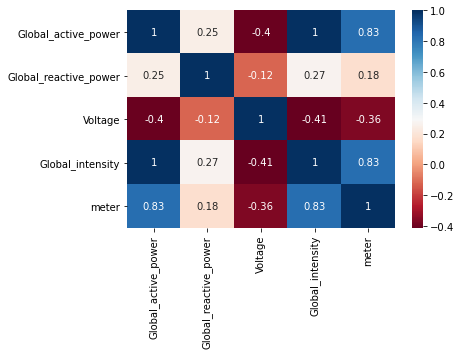

In [54]:
sns.heatmap(df_sample.corr(), annot=True, cmap="RdBu")
plt.show()

In [55]:
#Graphical Representation

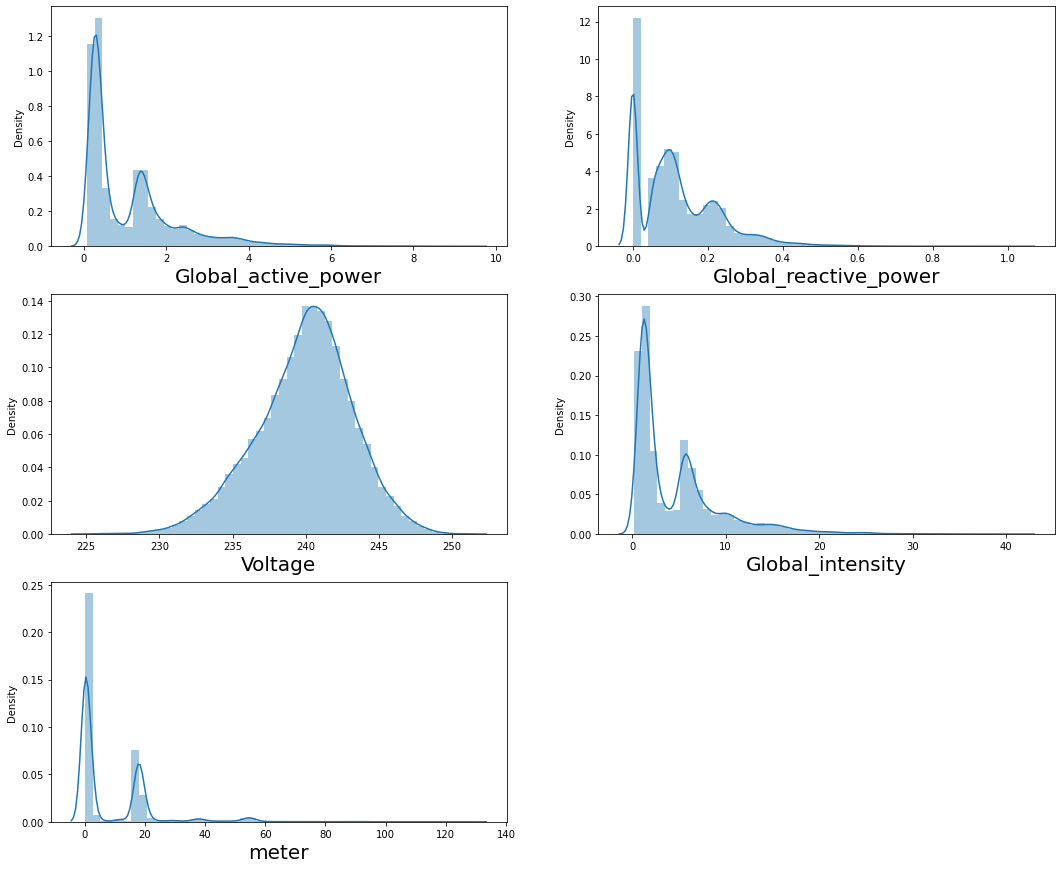

In [56]:
plt.figure(figsize=(18,15),facecolor='white')
plotnumber=1
for columns in df_sample.columns[:]:
    if plotnumber<=5:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df_sample[columns])
        plt.xlabel(columns,fontsize=20)
    plotnumber+=1
plt.show()

In [57]:
#we can see that data is not normally distributed

In [58]:
from statsmodels.stats import weightstats
import scipy.stats as stats
#sns.displot(df_sample.Global_active_power)
print('Kurtosis of normal distribution: {}'.format(stats.kurtosis(df_sample.Global_active_power)))
print('Skewness of normal distribution: {}'.format(stats.skew(df_sample.Global_active_power)))
print('Kurtosis of normal distribution: {}'.format(stats.kurtosis(df_sample.Global_reactive_power)))
print('Skewness of normal distribution: {}'.format(stats.skew(df_sample.Global_reactive_power)))
print('Kurtosis of normal distribution: {}'.format(stats.kurtosis(df_sample.Voltage)))
print('Skewness of normal distribution: {}'.format(stats.skew(df_sample.Voltage)))
print('Kurtosis of normal distribution: {}'.format(stats.kurtosis(df_sample.Global_intensity)))
print('Skewness of normal distribution: {}'.format(stats.skew(df_sample.Global_intensity)))

Kurtosis of normal distribution: 3.695512937912331
Skewness of normal distribution: 1.7518866977581877
Kurtosis of normal distribution: 2.62045383649391
Skewness of normal distribution: 1.2601338663025305
Kurtosis of normal distribution: 0.28500394126339
Skewness of normal distribution: -0.3576646060327304
Kurtosis of normal distribution: 4.028087491518512
Skewness of normal distribution: 1.8072516694566274


In [59]:
b={'Feature':['Global_active_power','Global_reactive_power','Voltage','Global_intensity'],'Skewness value':[4.284625114582224,2.4572228719791944,0.6911557630615857,4.670070085507305],'Decision_1':['positively skewed','positively skewed','symmetric','positively skewed'],'Kurtosis value':[1.7857248034308675,1.2449727682210145,-0.32968135466811055,1.8500078554480717
],'Decision_2':['leptokurtic','leptokurtic','mesokurtic','leptokurtic']}

In [60]:
df2=pd.DataFrame(b)

In [61]:
df2

,Feature,Skewness value,Decision_1,Kurtosis value,Decision_2
0,Global_active_power,4.284625,positively skewed,1.785725,leptokurtic
1,Global_reactive_power,2.457223,positively skewed,1.244973,leptokurtic
2,Voltage,0.691156,symmetric,-0.329681,mesokurtic
3,Global_intensity,4.670070,positively skewed,1.850008,leptokurtic


Condition for Z-test
Random samples

Each obsesrvation should be independant of other

sampling with replacement

If the sampling without replacement, sample size should not be more than 10%
Sampling distribution approximates normal distribution

Population is normally distributed and population standard deviation is known or sample size >= 30
One Sample Z Test
Has the mean chnged

H0 mean=150

H1 mean != 150

0.3 < 0.05

if (p <0.05) then

    reject null
else:

    accept null
#####################

mean higher 0.6515 > 1.645

if test > 1.645:
reject null
else:

    accept null
#####################

mean lower

if test < -1.645:

     reject null
else:

    accept null
#####################

Two tail test

if test < -1.96 or test > 1.96:

     reject null
else:

    accept null

     

In [62]:
df_sample['Voltage'].mean()


239.94435194325138

In [63]:
weightstats.ztest(df_sample['Voltage'], value=239)


(70.18913970153741, 0.0)

In [64]:
if 0.0< 0.05:
    print("Reject")
else:
    print("accept")

Reject


In [65]:
df_sample['Global_active_power'].mean()


1.1174584330193855

In [66]:
weightstats.ztest(df_sample['Global_active_power'], value=1.111)


(1.3870648013349618, 0.16542200390596984)

In [67]:
if 0.9546< 0.05:
    print("Reject")
else:
    print("accept")

accept


In [68]:
df_sample['Global_reactive_power'].mean()


0.1189603988556317

In [69]:
weightstats.ztest(df_sample['Global_reactive_power'], value=0.118)

(2.136809832086071, 0.03261346211692996)

In [70]:
if 0.46< 0.05:
    print("Reject")
else:
    print("accept")

accept


In [71]:
a={'Z-calculated':[137.80089190887304,-0.0019157232890736617,0.11002692080627972,-0.0019379879734255576],'P-Value':[0.0,0.9984714748998245,0.9123880248111312,0.9984537102849074],'Decision':['reject','accept','accept','accept']}

In [72]:
df3=pd.DataFrame(a)
df3

,Z-calculated,P-Value,Decision
0,137.800892,0.000000,reject
1,-0.001916,0.998471,accept
2,0.110027,0.912388,accept
3,-0.001938,0.998454,accept


# check the outliers

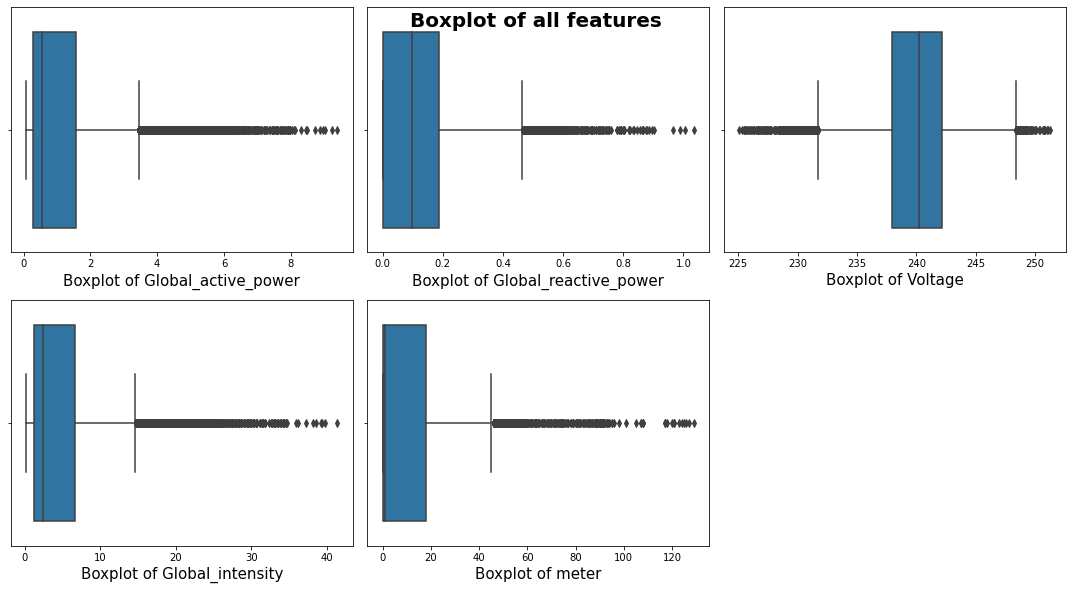

In [73]:
plt.figure(figsize=(15,20),facecolor='white')
plt.suptitle("Boxplot of all features",fontweight='bold',fontsize=20,y=0.989)
for i in range(0,len(df_sample.columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(x=df_sample.columns[i],data=df_sample)
    plt.xlabel("Boxplot of {}".format(df_sample.columns[i]),fontsize=15)
    plt.tight_layout()


In [74]:
#handlings the outliers
df1=df_sample.copy()


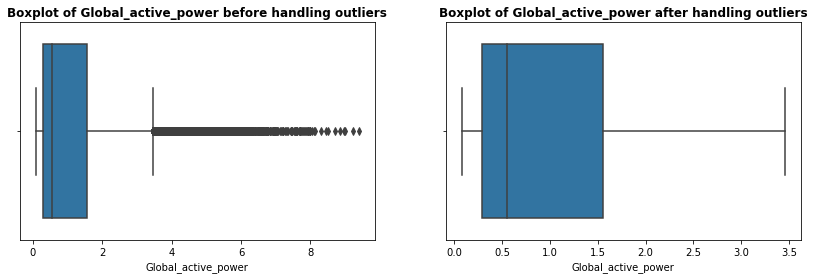

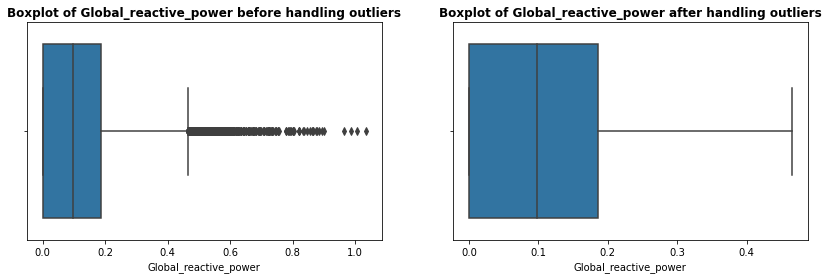

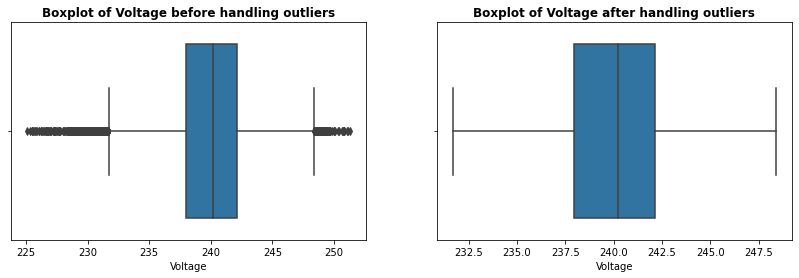

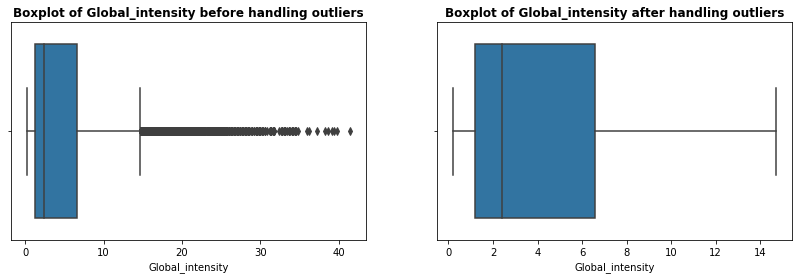

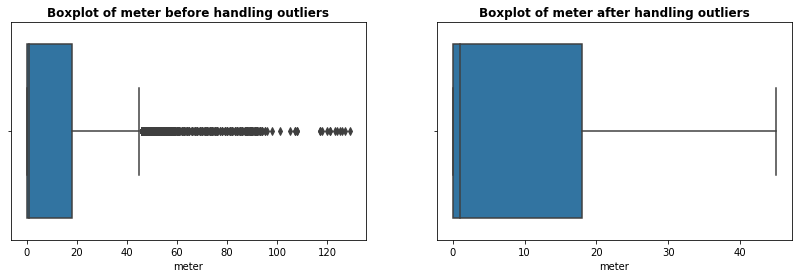

In [75]:
df1
feature_to_use=df1.columns

for i in range(len(feature_to_use)):
    IQR=df1[feature_to_use[i]].quantile(0.75)-df1[feature_to_use[i]].quantile(0.25)
    Lower_Limit=df1[feature_to_use[i]].quantile(0.25)-(1.5*IQR)
    Upper_Limit=df1[feature_to_use[i]].quantile(0.75)+(1.5*IQR) 
    df1[feature_to_use[i]]=np.where(df1[feature_to_use[i]]> Upper_Limit,Upper_Limit,np.where(df1[feature_to_use[i]]<Lower_Limit,Lower_Limit,df1[feature_to_use[i]]))
for a in feature_to_use:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.boxplot(x=a,data=df_sample)
    plt.title("Boxplot of {} before handling outliers".format(a),fontweight='bold')
    
    plt.subplot(122)
    sns.boxplot(x=a,data=df1)
    plt.title("Boxplot of {} after handling outliers".format(a),fontweight='bold')
    plt.show()


In [76]:
#The benefit of removing outliers is to enhance the accuracy 
#and stability of statistical models and ML algorithms by reducing their impact on results. 
#Outliers can distort statistical analyses and skew results as they are extreme values that differ from the rest of the data. 
#Removing outliers makes the results more robust and accurate by eliminating their influence and 
#.reduces overfitting in ML algorithms by avoiding fitting to extreme values instead of the underlying data pattern.

The train-test split is a technique for evaluating the performance of a machine learning algorithm.

It can be used for classification or regression problems and can be used for any supervised learning algorithm.

The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

Train Dataset: Used to fit the machine learning model.
Test Dataset: Used to evaluate the fit machine learning model.
The objective is to estimate the performance of the machine learning model on new data: data not used to train the model.
Standardization makes all variables contribute equally. SVM kernel methods are based on distance so it is required to scale variable prior to running the final SVM model. It is necessary to standardize variables before using lasso and ridge regression
The main uses of regression analysis are forecasting, time series modeling and finding the cause and effect relationship between variables.A regression model provides a function that describes the relationship between one or more independent variables and a response, dependent, or target variable.A linear regression is a model where the relationship between inputs and outputs is a straight line. This is the easiest to conceptualize and even observe in the real world. Even when a relationship isn’t very linear, our brains try to see the pattern and attach a rudimentary linear model to that relationship
Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity.
Lasso regression is a regularisation technique. It is used over regression methods for more accurate prediction

In [77]:
x=df_sample.iloc[:,:-1]
x


,Global_active_power,Global_reactive_power,Voltage,Global_intensity
838624,0.238,0.094,238.85,1.0
123524,2.010,0.234,236.94,8.6
384105,0.220,0.050,239.87,1.0
339343,1.414,0.098,234.60,6.0
23196,0.440,0.126,237.91,1.8
...,...,...,...,...
175162,1.380,0.202,237.29,5.8
509640,0.514,0.000,245.96,2.2
118459,0.478,0.340,244.10,2.4
906667,2.422,0.212,240.03,11.0


In [78]:
y=df_sample['meter']
y

838624     3.0
123524    19.0
384105     0.0
339343    17.0
23196      1.0
          ... 
175162    18.0
509640     0.0
118459     1.0
906667    34.0
681099     3.0
Name: meter, Length: 59771, dtype: float64

In [79]:
x.shape,y.shape

((59771, 4), (59771,))

Train Test Split

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [81]:
x_train.shape,y_train.shape

((40046, 4), (40046,))

In [82]:
x_test.shape,y_test.shape

((19725, 4), (19725,))

Standardization

In [83]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

Model Building

In [84]:
report=[]

In [85]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [86]:
models={
    'Linear Regression': LinearRegression(),
    'Ridge Regression':Ridge(),
    'Lasso Regression':Lasso(),
    'Support Vector Regression':SVR(),
    'Decision Tree Regressor':DecisionTreeRegressor(),
    'Random Forest Regressor':RandomForestRegressor()
    
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)#training models
    
    #predictions
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    
    #training data performance matrix
    model_train_mse=mean_squared_error(y_train,y_train_pred)  #calculate MSE
    model_train_mae=mean_absolute_error(y_train,y_train_pred) #calculate MAE
    model_train_r2=r2_score(y_train,y_train_pred)             #calculate 2 square
    model_train_ad_r2=1-(1-model_train_r2)*(len(y_train)-1)/(len(y_train)-x_train.shape[1])
                                                          
    #testing data performance matrix
    model_test_mse=mean_squared_error(y_test,y_test_pred)  #calculate MSE
    model_test_mae=mean_absolute_error(y_test,y_test_pred) #calculate MAE
    model_test_r2=r2_score(y_test,y_test_pred)             #calculate 2 square
    model_test_ad_r2=1-(1-model_test_r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1])
    report.append({
                   "model" : (list(models.keys()))[i],
                   'Train Mean Squared Error': model_train_mse,
                   'Test Mean Squared Error' : model_test_mse,
                   'Train Mean Absolute Error' : model_train_mae,
                   'Test Mean Absolute Error': model_test_mae,
                   'Train R Square':model_train_r2,
                   'Test R Square':model_test_r2,
                   'Train Adj R Square':model_train_ad_r2,
                   'Test Adj R Square':model_test_ad_r2
    })                                            
    
                                                          
                            
all_model=pd.DataFrame(report)    
all_model                                                      
   

,model,Train Mean Squared Error,Test Mean Squared Error,Train Mean Absolute Error,Test Mean Absolute Error,Train R Square,Test R Square,Train Adj R Square,Test Adj R Square
0,Linear Regression,55.041513,54.883310,4.568496,4.599670,0.690635,0.699808,0.690612,0.699763
1,Ridge Regression,55.041785,54.884295,4.568967,4.600076,0.690634,0.699803,0.690611,0.699757
2,Lasso Regression,56.492330,56.850342,4.776770,4.818225,0.682481,0.689049,0.682457,0.689002
3,Support Vector Regression,52.864316,54.182785,3.498524,3.565477,0.702872,0.703640,0.702850,0.703595
4,Decision Tree Regressor,0.001396,84.934062,0.002343,3.993861,0.999992,0.535442,0.999992,0.535371
5,Random Forest Regressor,6.435937,45.611354,1.230292,3.381156,0.963826,0.750522,0.963824,0.750485


In [ ]:
 report.append({
                   "model":(list(models.keys()))[i],
                   'Train Mean Squared Error':model_train_mse,
                   'Test Mean Squared Error':model_test_mse,
                   'Train Mean Absolute Error':model_train_mae,
                   'Test Mean Absolute Error':model_test_mae,
                   'Train R square':model_train_r2,
                   'Test R square':model_test_r2,
                   'Train Adj R Square':model_train_ad_r2,
                   'Test Adj R Square':model_test_ad_r2,
     })                                                      
all_model=pd.DataFrame(report)    
all_model

# hyperparameter tunning on random search cv

In [120]:
Ran_param={
    "max_depth":[5,8,15,None,10],
    'max_features':[3,'auto'],
    'min_samples_split':[2,8,15,20],
    'n_estimators':[50,100,200,500]
}

In [121]:
from sklearn.model_selection import RandomizedSearchCV

In [122]:
random = RandomizedSearchCV(estimator = RandomForestRegressor(),
                            param_distributions=Ran_param,
                            n_iter=100,
                            cv=3,
                            verbose=2,
                            n_jobs=-1)

In [123]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier



In [124]:
Params={"max depth":[3,None],
          "max_features":[1,3,10],
          "min_samples_split":[1,3,10],
         "min_samples_leaf":[1,3,10]}
        
        


In [126]:
random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 14.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 15, None, 10],
                                        'max_features': [3, 'auto'],
                                        'min_samples_split': [2, 8, 15, 20],
                                        'n_estimators': [50, 100, 200, 500]},
                   verbose=2)

In [131]:
rf_best_para=RandomForestRegressor(max_depth=10,max_features=3,min_samples_split=20,n_estimators=200)
rf_best_para.fit(x_train,y_train)
#predictions
rf_pred_train=rf_best_para.predict(x_train)
rf_test_pred=rf_best_para.predict(x_test)
#training data performance matrix
rf_train_mse=mean_squared_error(y_train,rf_pred_train)  #calculate MSE
rf_train_mae=mean_absolute_error(y_train,rf_pred_train) #calculate MAE
rf_train_r2=r2_score(y_train,rf_pred_train)             #calculate 2 square
rf_train_ad_r2=1-(1-rf_train_r2)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)

#test data performance matrix
rf_test_mse=mean_squared_error(y_test,rf_pred_test)  #calculate MSE
rf_test_mae=mean_absolute_error(y_test,rf_pred_test) #calculate MAE
rf_test_r2=r2_score(y_test,rf_pred_test)             #calculate 2 square
rf_test_ad_r2=1-(1-model_test_r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

print("\n")
print("Hyperparameter tuning on random forest")
print("Model Performance For Training Data")
print("-Mean Squared Error: (:4f}".format (rf_train_mse) )
print("-Mean Absolute Error {.4f}". format (rf_train_mae))
print("-R Sqaure : {:.4f}".format (rf_train_r2))
print("-Adj R Sqaure:{:.4f}".format(rf_train_ad_r2))


print("---------------------------")

print("Model Performance For Test Data")
print("-Mean Squared Error: (:4f}".format (rf_test_mse) )
print("-Mean Absolute Error {.4f}". format (rf_test_mae))
print("-R Sqaure : {:.4f}".format (rf_test_r2))
print("-Adj R Sqaure:{:.4f}".format(rf_test_ad_r2))
                          

NameError: name 'rf_pred_test' is not defined

# Bagging Regressor

In [118]:
report2=[]
#bagging using decisiontreeRegressor
dt_bag=BaggingRegressor(n_estimators=100)
#If None,then the base estimator is DecisionTreeRegressor
dt_bag.fit(x_train,y_train)

#predictions
train_pred_bag=dt_bag.predict(x_train)
test_pred=dt_bag.predict(x_test)

#training data performance matrix
bag_train_mse=mean_squared_error(y_train,train_pred_bag)  #calculate MSE
bag_train_mae=mean_absolute_error(y_train,train_pred_bag) #calculate MAE
bag_train_r2=r2_score(y_train,train_pred_bag)             #calculate 2 square
bag_train_ad_r2=1-(1-bag_train*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)

#test data performance matrix
bag_test_mse=mean_squared_error(y_test,test_pred_bag)  #calculate MSE
bag_test_mae=mean_absolute_error(y_test,test_pred_bag) #calculate MAE
bag_test_r2=r2_score(y_test,test_pred_bag)             #calculate 2 square
bag_test_ad_r2=1-(1-bag_test_r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)                
                

#print("\n")
#print("bagging regressor")
#print("Model Performance For Training Data")
#print("-Mean Squared Error: (:4f}".format (rf_train_mse) )
#print("-Mean Absolute Error {.4f}". format (rf_train_mae))
#print("-R Sqaure : {:.4f}".format (rf_train_r2))
#print("-Adj R Sqaure:{:.4f}".format(rf_train_ad_r2))


#print("---------------------------")

#print("Model Performance For Test Data")
#print("-Mean Squared Error: (:4f}".format (rf_test_mse) )
#print("-Mean Absolute Error {.4f}". format (rf_test_mae))
#print("-R Sqaure : {:.4f}".format (rf_test_r2))
#print("-Adj R Sqaure:{:.4f}".format(rf_test_ad_r2))

report2.append({
             "model":"bagging Regressor",
             'Train Mean Squared Error':bag_train_mse,
             'Test Mean Squared Error':bag_test_mse,
             'Train Mean Absolute Error'bag_train_mae,
             'Test Mean Absolute Error':bag_test_mae,
             'Train R square':bag_train_r2,
             'Test R square':bag_test_r2,
             'Train Adj R Square':bag_train_ad_r2,
             'Test Adj R Square':bag_train_ad_r2,
})  
Bagging_reort=pd.DataFrame(rf_record)
Bagging_report
    
                          

SyntaxError: invalid syntax (<ipython-input-118-2caa43933af3>, line 18)

In [ ]:
#Hyper-parameter tunning of bagging regreesor

In [ ]:
bag_param={
    'n_estimators':[50,100,200,500],
    'max_samples':range(2,5,1),
    'max_features':[2,3]
}

In [ ]:
bag_ran_search=RandomizedSearchCV(estimatior=dt_bag,
                    param_distributions=bag_param,
                    n_iter=100,
                    n_jobs=1  
                    cv=3,
                    verbose=2              
                    )

In [ ]:
bag_ran_search.fit(x_train,y_train)

In [ ]:
bag_ran_search.best_params_bag_ran_search_estimator_

In [ ]:
bag_model_hyp=BaggingRegressor(max_features=4,max_samples=10,n_estimators=50)
bag_model_hyp.fit(x_train,y_train)
#predictions
train_pred_baghyp=bag_model_hyp.predict(x_train)
test_pred_baghyp=bag_model_hyp.predict(x_test)

#training data performance matrix
baghy_train_mse=mean_squared_error(y_train,train_pred_baghyp)  #calculate MSE
baghy_train_mae=mean_absolute_error(y_train,train_pred_baghyp) #calculate MAE
baghy_train_r2=r2_score(y_train,train_pred_baghyp)             #calculate 2 square
baghy_train_ad_r2=1-(1-baghy_train_r2)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]

#test data performance matrix
baghy_test_mse=mean_squared_error(y_test,test_pred_baghyp)  #calculate MSE
baghy_test_mae=mean_absolute_error(y_test,test_pred_baghyp) #calculate MAE
baghy_test_r2=r2_score(y_test,test_pred_baghyp)             #calculate 2 square
baghy_test_ad_r2=1-(1-baghy_test_r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)


print("hyperparameter tunning for bagging regressor")
print("Model Performance For Training Data")
print("-Mean Squared Error: (:4f}".format (baghy_train_mse) )
print("-Mean Absolute Error {.4f}". format (baghy_train_mae))
print("-R Sqaure : {:.4f}".format (baghy_train_r2))
print("-Adj R Sqaure:{:.4f}".format(baghy_train_ad_r2))


print("---------------------------")

print("Model Performance For Test Data")
print("-Mean Squared Error: (:4f}".format (baghy_test_mse) )
print("-Mean Absolute Error {.4f}". format (baghy_test_mae))
print("-R Sqaure : {:.4f}".format (baghy_test_r2))
print("-Adj R Sqaure:{:.4f}".format(baghy_test_ad_r2))



In [ ]:
bag_record=[] 
report.append({
             "model":"hyper-parameter tunning on bagging Regressor",
             'Train Mean Squared Error':baghy_train_mse,
             'Test Mean Squared Error':baghy_test_mse,
             'Train Mean Absolute Error'baghy_train_mae,
             'Test Mean Absolute Error':baghy_test_mae,
             'Train R square':baghy_train_r2,
             'Test R square':baghy_test_r2,
             'Train Adj R Square':baghy_train_ad_r2,
             'Test Adj R Square':baghy_train_ad_r2,
              })  
hypertuned_bag=pd.DataFrame(bag_record)
hypertuned_bag 

# Summary
#accuracy report for all columns

In [ ]:
frames3=[all_model,Bagging_report,Hypertuned_rf,Hypertuned_bag]
all_records=pd.concat(frames3)
all_records.reset_index(inplace=True)
all_records.drop('index',axis=1,inplace=True)
all_records.sort_values(by='Test R Square',ascending=False)

In [ ]:
#store the best model in pickle file
import pickle
pickle.dump(rf_best_para,open('random_forest_hypertuned.sav',;wb))